In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files
from imblearn.over_sampling import SMOTE



**Read the Data set**

In [ ]:

dataSet = pd.read_csv("/content/smoking.csv")
dataSet

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


**Convert the categoriel values into Numaric ones**



1.   Gender: Female = 1, male = 0
2.   tartar: has = 1, doesn't has = 0



In [ ]:
categorical_columns = ['gender', 'oral', 'tartar']
dataSet = pd.get_dummies(dataSet, columns=categorical_columns, drop_first=False)


In [ ]:
dataSet = dataSet.drop('tartar_N',axis = 1)
dataSet = dataSet.drop('oral_Y',axis = 1)
dataSet = dataSet.drop('gender_M',axis = 1)
dataSet = dataSet.drop('ID', axis = 1)
dataSet = dataSet.drop('hearing(right)',axis =1)
dataSet = dataSet.drop('hearing(left)',axis =1)
dataSet = dataSet.drop('tartar_Y',axis =1)
dataSet = dataSet.drop('eyesight(right)',axis =1)
dataSet = dataSet.drop('eyesight(left)',axis =1)
dataSet = dataSet.drop('Urine protein',axis = 1)
dataSet

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_F
0,40,155,60,81.3,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,0.7,18.0,19.0,27.0,0,0,1
1,40,160,60,81.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,0.6,22.0,19.0,18.0,0,0,1
2,55,170,60,80.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,21.0,16.0,22.0,0,1,0
3,40,165,70,88.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,19.0,26.0,18.0,0,0,0
4,40,155,60,86.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,0.6,16.0,14.0,22.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,170,65,75.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,0.6,14.0,7.0,10.0,1,0,1
55688,45,160,50,70.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,0.9,20.0,12.0,14.0,0,0,1
55689,55,160,50,68.5,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,0.5,17.0,11.0,12.0,0,0,1
55690,60,165,60,78.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,0.7,20.0,19.0,18.0,0,0,0


In [ ]:
dataSet['BMI'] = dataSet['weight(kg)'] / ((dataSet['height(cm)'] / 100) ** 2)
dataSet

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_F,BMI
0,40,155,60,81.3,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,0.7,18.0,19.0,27.0,0,0,1,24.973985
1,40,160,60,81.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,0.6,22.0,19.0,18.0,0,0,1,23.437500
2,55,170,60,80.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,21.0,16.0,22.0,0,1,0,20.761246
3,40,165,70,88.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,19.0,26.0,18.0,0,0,0,25.711662
4,40,155,60,86.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,0.6,16.0,14.0,22.0,0,0,1,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,170,65,75.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,0.6,14.0,7.0,10.0,1,0,1,22.491349
55688,45,160,50,70.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,0.9,20.0,12.0,14.0,0,0,1,19.531250
55689,55,160,50,68.5,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,0.5,17.0,11.0,12.0,0,0,1,19.531250
55690,60,165,60,78.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,0.7,20.0,19.0,18.0,0,0,0,22.038567


In [ ]:
dataSet = dataSet.drop('weight(kg)',axis = 1)
dataSet = dataSet.drop('height(cm)', axis = 1)
dataSet

,age,waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_F,BMI
0,40,81.3,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,0.7,18.0,19.0,27.0,0,0,1,24.973985
1,40,81.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,0.6,22.0,19.0,18.0,0,0,1,23.437500
2,55,80.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,21.0,16.0,22.0,0,1,0,20.761246
3,40,88.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,19.0,26.0,18.0,0,0,0,25.711662
4,40,86.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,0.6,16.0,14.0,22.0,0,0,1,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,75.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,0.6,14.0,7.0,10.0,1,0,1,22.491349
55688,45,70.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,0.9,20.0,12.0,14.0,0,0,1,19.531250
55689,55,68.5,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,0.5,17.0,11.0,12.0,0,0,1,19.531250
55690,60,78.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,0.7,20.0,19.0,18.0,0,0,0,22.038567


https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

In [ ]:
def blood_pressure(row):
    systolic = row['systolic']
    relaxation = row['relaxation']

    if systolic > 130 or relaxation > 80:
        return 1 #high
    elif 90 <= systolic <= 130 and 60 <= relaxation <= 80:
        return 2 #normal
    elif systolic < 90 or relaxation < 60:
        return 3 #low
    else:
        return 0 #Undefined

In [ ]:
dataSet['Blood Pressure'] = dataSet.apply(blood_pressure, axis=1)
dataSet

,age,waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_F,BMI,Blood Pressure
0,40,81.3,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,0.7,18.0,19.0,27.0,0,0,1,24.973985,2
1,40,81.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,0.6,22.0,19.0,18.0,0,0,1,23.437500,2
2,55,80.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,21.0,16.0,22.0,0,1,0,20.761246,1
3,40,88.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,19.0,26.0,18.0,0,0,0,25.711662,2
4,40,86.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,0.6,16.0,14.0,22.0,0,0,1,24.973985,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,75.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,0.6,14.0,7.0,10.0,1,0,1,22.491349,2
55688,45,70.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,0.9,20.0,12.0,14.0,0,0,1,19.531250,2
55689,55,68.5,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,0.5,17.0,11.0,12.0,0,0,1,19.531250,2
55690,60,78.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,0.7,20.0,19.0,18.0,0,0,0,22.038567,1


In [ ]:
# Count the number of 'Undefined' values in the 'Blood Pressure' column
undefined_count = dataSet[dataSet['Blood Pressure'] == 1].shape[0]

print(f"Number of Undefined values in Blood Pressure column: {undefined_count}")

# low(3) = 1233
# normal(2) = 35296
#high(1) = 19163
#Undefined = 0

Number of Undefined values in Blood Pressure column: 19163


In [ ]:
dataSet = dataSet.drop('systolic', axis = 1)
dataSet = dataSet.drop('relaxation', axis = 1)
dataSet


,age,waist(cm),fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_F,BMI,Blood Pressure
0,40,81.3,94.0,215.0,82.0,73.0,126.0,12.9,0.7,18.0,19.0,27.0,0,0,1,24.973985,2
1,40,81.0,130.0,192.0,115.0,42.0,127.0,12.7,0.6,22.0,19.0,18.0,0,0,1,23.437500,2
2,55,80.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,21.0,16.0,22.0,0,1,0,20.761246,1
3,40,88.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,19.0,26.0,18.0,0,0,0,25.711662,2
4,40,86.0,80.0,184.0,74.0,62.0,107.0,12.5,0.6,16.0,14.0,22.0,0,0,1,24.973985,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,75.0,89.0,213.0,99.0,75.0,118.0,12.3,0.6,14.0,7.0,10.0,1,0,1,22.491349,2
55688,45,70.0,89.0,166.0,69.0,73.0,79.0,14.0,0.9,20.0,12.0,14.0,0,0,1,19.531250,2
55689,55,68.5,88.0,158.0,77.0,79.0,63.0,12.4,0.5,17.0,11.0,12.0,0,0,1,19.531250,2
55690,60,78.0,107.0,210.0,79.0,48.0,146.0,14.4,0.7,20.0,19.0,18.0,0,0,0,22.038567,1


In [ ]:
dataSet['LDL/HDL ratio'] = dataSet['LDL'] / dataSet['HDL']
dataSet

,age,waist(cm),fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_F,BMI,Blood Pressure,LDL/HDL ratio
0,40,81.3,94.0,215.0,82.0,73.0,126.0,12.9,0.7,18.0,19.0,27.0,0,0,1,24.973985,2,1.726027
1,40,81.0,130.0,192.0,115.0,42.0,127.0,12.7,0.6,22.0,19.0,18.0,0,0,1,23.437500,2,3.023810
2,55,80.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,21.0,16.0,22.0,0,1,0,20.761246,1,2.745455
3,40,88.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,19.0,26.0,18.0,0,0,0,25.711662,2,5.022222
4,40,86.0,80.0,184.0,74.0,62.0,107.0,12.5,0.6,16.0,14.0,22.0,0,0,1,24.973985,2,1.725806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,75.0,89.0,213.0,99.0,75.0,118.0,12.3,0.6,14.0,7.0,10.0,1,0,1,22.491349,2,1.573333
55688,45,70.0,89.0,166.0,69.0,73.0,79.0,14.0,0.9,20.0,12.0,14.0,0,0,1,19.531250,2,1.082192
55689,55,68.5,88.0,158.0,77.0,79.0,63.0,12.4,0.5,17.0,11.0,12.0,0,0,1,19.531250,2,0.797468
55690,60,78.0,107.0,210.0,79.0,48.0,146.0,14.4,0.7,20.0,19.0,18.0,0,0,0,22.038567,1,3.041667


https://altibbi.com/%D8%A7%D9%84%D9%81%D8%AD%D9%88%D8%B5%D8%A7%D8%AA-%D9%88%D8%A7%D9%84%D8%AA%D8%AD%D8%A7%D9%84%D9%8A%D9%84/%D9%86%D8%B3%D8%A8%D8%A9-%D8%A7%D9%84%D9%83%D9%88%D9%84%D9%8A%D8%B3%D8%AA%D8%B1%D9%88%D9%84-%D8%A7%D9%84%D8%B3%D9%8A%D8%A1-%D8%A7%D9%84%D9%89-%D8%A7%D9%84%D9%83%D9%88%D9%84%D9%8A%D8%B3%D8%AA%D8%B1%D9%88%D9%84-%D8%A7%D9%84%D8%AC%D9%8A%D8%AF-370

In [ ]:

dataSet = dataSet.drop('HDL', axis = 1)
dataSet = dataSet.drop('LDL', axis = 1)
dataSet

,age,waist(cm),fasting blood sugar,Cholesterol,triglyceride,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_F,BMI,Blood Pressure,LDL/HDL ratio
0,40,81.3,94.0,215.0,82.0,12.9,0.7,18.0,19.0,27.0,0,0,1,24.973985,2,1.726027
1,40,81.0,130.0,192.0,115.0,12.7,0.6,22.0,19.0,18.0,0,0,1,23.437500,2,3.023810
2,55,80.0,89.0,242.0,182.0,15.8,1.0,21.0,16.0,22.0,0,1,0,20.761246,1,2.745455
3,40,88.0,96.0,322.0,254.0,14.7,1.0,19.0,26.0,18.0,0,0,0,25.711662,2,5.022222
4,40,86.0,80.0,184.0,74.0,12.5,0.6,16.0,14.0,22.0,0,0,1,24.973985,2,1.725806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,75.0,89.0,213.0,99.0,12.3,0.6,14.0,7.0,10.0,1,0,1,22.491349,2,1.573333
55688,45,70.0,89.0,166.0,69.0,14.0,0.9,20.0,12.0,14.0,0,0,1,19.531250,2,1.082192
55689,55,68.5,88.0,158.0,77.0,12.4,0.5,17.0,11.0,12.0,0,0,1,19.531250,2,0.797468
55690,60,78.0,107.0,210.0,79.0,14.4,0.7,20.0,19.0,18.0,0,0,0,22.038567,1,3.041667


In [ ]:
dataSet = dataSet.drop('dental caries', axis = 1)
dataSet

,age,waist(cm),fasting blood sugar,Cholesterol,triglyceride,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking,gender_F,BMI,Blood Pressure,LDL/HDL ratio
0,40,81.3,94.0,215.0,82.0,12.9,0.7,18.0,19.0,27.0,0,1,24.973985,2,1.726027
1,40,81.0,130.0,192.0,115.0,12.7,0.6,22.0,19.0,18.0,0,1,23.437500,2,3.023810
2,55,80.0,89.0,242.0,182.0,15.8,1.0,21.0,16.0,22.0,1,0,20.761246,1,2.745455
3,40,88.0,96.0,322.0,254.0,14.7,1.0,19.0,26.0,18.0,0,0,25.711662,2,5.022222
4,40,86.0,80.0,184.0,74.0,12.5,0.6,16.0,14.0,22.0,0,1,24.973985,2,1.725806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,75.0,89.0,213.0,99.0,12.3,0.6,14.0,7.0,10.0,0,1,22.491349,2,1.573333
55688,45,70.0,89.0,166.0,69.0,14.0,0.9,20.0,12.0,14.0,0,1,19.531250,2,1.082192
55689,55,68.5,88.0,158.0,77.0,12.4,0.5,17.0,11.0,12.0,0,1,19.531250,2,0.797468
55690,60,78.0,107.0,210.0,79.0,14.4,0.7,20.0,19.0,18.0,0,0,22.038567,1,3.041667


In [ ]:
dataSet['AST/ALT ratio'] = dataSet['AST'] / dataSet['ALT']
dataSet

,age,waist(cm),fasting blood sugar,Cholesterol,triglyceride,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking,gender_F,BMI,Blood Pressure,LDL/HDL ratio,AST/ALT ratio
0,40,81.3,94.0,215.0,82.0,12.9,0.7,18.0,19.0,27.0,0,1,24.973985,2,1.726027,0.947368
1,40,81.0,130.0,192.0,115.0,12.7,0.6,22.0,19.0,18.0,0,1,23.437500,2,3.023810,1.157895
2,55,80.0,89.0,242.0,182.0,15.8,1.0,21.0,16.0,22.0,1,0,20.761246,1,2.745455,1.312500
3,40,88.0,96.0,322.0,254.0,14.7,1.0,19.0,26.0,18.0,0,0,25.711662,2,5.022222,0.730769
4,40,86.0,80.0,184.0,74.0,12.5,0.6,16.0,14.0,22.0,0,1,24.973985,2,1.725806,1.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,75.0,89.0,213.0,99.0,12.3,0.6,14.0,7.0,10.0,0,1,22.491349,2,1.573333,2.000000
55688,45,70.0,89.0,166.0,69.0,14.0,0.9,20.0,12.0,14.0,0,1,19.531250,2,1.082192,1.666667
55689,55,68.5,88.0,158.0,77.0,12.4,0.5,17.0,11.0,12.0,0,1,19.531250,2,0.797468,1.545455
55690,60,78.0,107.0,210.0,79.0,14.4,0.7,20.0,19.0,18.0,0,0,22.038567,1,3.041667,1.052632


In [ ]:

dataSet = dataSet.drop('AST', axis = 1)
dataSet = dataSet.drop('ALT', axis = 1)
dataSet

,age,waist(cm),fasting blood sugar,Cholesterol,triglyceride,hemoglobin,serum creatinine,Gtp,smoking,gender_F,BMI,Blood Pressure,LDL/HDL ratio,AST/ALT ratio
0,40,81.3,94.0,215.0,82.0,12.9,0.7,27.0,0,1,24.973985,2,1.726027,0.947368
1,40,81.0,130.0,192.0,115.0,12.7,0.6,18.0,0,1,23.437500,2,3.023810,1.157895
2,55,80.0,89.0,242.0,182.0,15.8,1.0,22.0,1,0,20.761246,1,2.745455,1.312500
3,40,88.0,96.0,322.0,254.0,14.7,1.0,18.0,0,0,25.711662,2,5.022222,0.730769
4,40,86.0,80.0,184.0,74.0,12.5,0.6,22.0,0,1,24.973985,2,1.725806,1.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,75.0,89.0,213.0,99.0,12.3,0.6,10.0,0,1,22.491349,2,1.573333,2.000000
55688,45,70.0,89.0,166.0,69.0,14.0,0.9,14.0,0,1,19.531250,2,1.082192,1.666667
55689,55,68.5,88.0,158.0,77.0,12.4,0.5,12.0,0,1,19.531250,2,0.797468,1.545455
55690,60,78.0,107.0,210.0,79.0,14.4,0.7,18.0,0,0,22.038567,1,3.041667,1.052632


In [ ]:
desired_column_order  =['age', 'gender_F', 'BMI', 'waist(cm)','Blood Pressure', 'fasting blood sugar', 'Cholesterol',
                        'triglyceride','LDL/HDL ratio','hemoglobin','serum creatinine','AST/ALT ratio', 'Gtp', 'smoking']
dataSet = dataSet[desired_column_order]
dataSet

,age,gender_F,BMI,waist(cm),Blood Pressure,fasting blood sugar,Cholesterol,triglyceride,LDL/HDL ratio,hemoglobin,serum creatinine,AST/ALT ratio,Gtp,smoking
0,40,1,24.973985,81.3,2,94.0,215.0,82.0,1.726027,12.9,0.7,0.947368,27.0,0
1,40,1,23.437500,81.0,2,130.0,192.0,115.0,3.023810,12.7,0.6,1.157895,18.0,0
2,55,0,20.761246,80.0,1,89.0,242.0,182.0,2.745455,15.8,1.0,1.312500,22.0,1
3,40,0,25.711662,88.0,2,96.0,322.0,254.0,5.022222,14.7,1.0,0.730769,18.0,0
4,40,1,24.973985,86.0,2,80.0,184.0,74.0,1.725806,12.5,0.6,1.142857,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,1,22.491349,75.0,2,89.0,213.0,99.0,1.573333,12.3,0.6,2.000000,10.0,0
55688,45,1,19.531250,70.0,2,89.0,166.0,69.0,1.082192,14.0,0.9,1.666667,14.0,0
55689,55,1,19.531250,68.5,2,88.0,158.0,77.0,0.797468,12.4,0.5,1.545455,12.0,0
55690,60,0,22.038567,78.0,1,107.0,210.0,79.0,3.041667,14.4,0.7,1.052632,18.0,0


In [ ]:
dataSet.to_csv('cleanDataSet.csv', index=False)

files.download('cleanDataSet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**summary of the main characteristics**

for each feature find the following:

1- Mean: It provides a measure of the average value and is sensitive to the outlayers.

2- std: A higher standard deviation indicates greater variability in the data.

3- min: It helps identify the smallest observation in the dataset.

4- 25%: The median of the lower half of the dataset

5- 50%: The middle value when the dataset is sorted

6- 75%:  The median of the upper half of the dataset

7- max: Helps identify the maximum observation in the dataset


In [ ]:
summary_stats = dataSet.describe().round(2).transpose()
summary_stats = summary_stats.drop('count',axis=1)
summary_stats

,mean,std,min,25%,50%,75%,max
age,44.18,12.07,20.00,40.00,40.00,55.00,85.00
gender_F,0.36,0.48,0.00,0.00,0.00,1.00,1.00
BMI,24.17,3.48,14.27,21.60,23.88,26.12,42.45
waist(cm),82.05,9.27,51.00,76.00,82.00,88.00,129.00
Blood Pressure,1.68,0.51,1.00,1.00,2.00,2.00,3.00
fasting blood sugar,99.31,20.80,46.00,89.00,96.00,104.00,505.00
Cholesterol,196.90,36.30,55.00,172.00,195.00,220.00,445.00
triglyceride,126.67,71.64,8.00,74.00,108.00,160.00,999.00
LDL/HDL ratio,2.14,0.98,0.02,1.53,2.04,2.63,51.71
hemoglobin,14.62,1.56,4.90,13.60,14.80,15.80,21.10


from matplotlib import pyplot as plt
summary_stats['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_stats['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
summary_stats['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
cleanDataSet  = pd.read_csv("/content/cleanDataSet.csv")
cleanDataSet

,age,gender_F,BMI,waist(cm),Blood Pressure,fasting blood sugar,Cholesterol,triglyceride,LDL/HDL ratio,hemoglobin,serum creatinine,AST/ALT ratio,Gtp,smoking
0,40,1,24.973985,81.3,2,94.0,215.0,82.0,1.726027,12.9,0.7,0.947368,27.0,0
1,40,1,23.437500,81.0,2,130.0,192.0,115.0,3.023810,12.7,0.6,1.157895,18.0,0
2,55,0,20.761246,80.0,1,89.0,242.0,182.0,2.745455,15.8,1.0,1.312500,22.0,1
3,40,0,25.711662,88.0,2,96.0,322.0,254.0,5.022222,14.7,1.0,0.730769,18.0,0
4,40,1,24.973985,86.0,2,80.0,184.0,74.0,1.725806,12.5,0.6,1.142857,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,1,22.491349,75.0,2,89.0,213.0,99.0,1.573333,12.3,0.6,2.000000,10.0,0
55688,45,1,19.531250,70.0,2,89.0,166.0,69.0,1.082192,14.0,0.9,1.666667,14.0,0
55689,55,1,19.531250,68.5,2,88.0,158.0,77.0,0.797468,12.4,0.5,1.545455,12.0,0
55690,60,0,22.038567,78.0,1,107.0,210.0,79.0,3.041667,14.4,0.7,1.052632,18.0,0


**Split data to Traning, validation, testing sets**

1- 70% training

2- 15% validation

3- 15% testing

In [ ]:
target = cleanDataSet['smoking']
features = cleanDataSet.drop('smoking', axis=1)
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Combine the features and target for each set
train_combined = pd.concat([X_train, y_train], axis=1)
val_combined = pd.concat([X_val, y_val], axis=1)
test_combined = pd.concat([X_test, y_test], axis=1)

# Save the combined sets to CSV files
train_combined.to_csv('trainClean.csv', index=False)
val_combined.to_csv('valClean.csv', index=False)
test_combined.to_csv('testClean.csv', index=False)

files.download('trainClean.csv')
files.download('valClean.csv')
files.download('testClean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a function to plot histograms
def plot_histogram(data, column, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=False, color='blue', bins=30)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

# 1. Age Distribution
plot_histogram(cleanDataSet, 'age', 'Age Distribution', 'Age')

# 2. Gender Distribution
plt.figure(figsize=(7, 7))
cleanDataSet['gender_F'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# 3. BMI Distribution
plot_histogram(cleanDataSet, 'BMI', 'BMI Distribution', 'BMI')

# 4. Waist Circumference Distribution
plot_histogram(cleanDataSet, 'waist(cm)', 'Waist Circumference Distribution', 'Waist Circumference (cm)')

# 5. Blood Pressure Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Blood Pressure', data=cleanDataSet, palette='Set2')
plt.title('Blood Pressure Categories')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.show()

# 6. Fasting Blood Sugar Distribution
plot_histogram(cleanDataSet, 'fasting blood sugar', 'Fasting Blood Sugar Distribution', 'Fasting Blood Sugar (mg/dL)')

# 7. Cholesterol Distribution
plot_histogram(cleanDataSet, 'Cholesterol', 'Cholesterol Distribution', 'Cholesterol (mg/dL)')

# 8. Triglyceride Distribution
plot_histogram(cleanDataSet, 'triglyceride', 'Triglyceride Distribution', 'Triglyceride (mg/dL)')

# 9. LDL/HDL Ratio Distribution
plot_histogram(cleanDataSet, 'LDL/HDL ratio', 'LDL/HDL Ratio Distribution', 'LDL/HDL Ratio')

# 10. Hemoglobin Distribution
plot_histogram(cleanDataSet, 'hemoglobin', 'Hemoglobin Distribution', 'Hemoglobin (g/dL)')

# 11. Serum Creatinine Distribution
plot_histogram(cleanDataSet, 'serum creatinine', 'Serum Creatinine Distribution', 'Serum Creatinine (mg/dL)')

# 12. AST/ALT Ratio Distribution
plot_histogram(cleanDataSet, 'AST/ALT ratio', 'AST/ALT Ratio Distribution', 'AST/ALT Ratio')

# 13. GTP Distribution
plot_histogram(cleanDataSet, 'Gtp', 'GTP Distribution', 'GTP (U/L)')

# 14. Smoking Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking', data=cleanDataSet, palette='Set1')
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Count')
plt.show()


<ipython-input-36-32647d1541fc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=cleanDataSet, ax=ax, palette=[color])
<ipython-input-36-32647d1541fc>:16: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=column, data=cleanDataSet, ax=ax, palette=[color])
<ipython-input-36-32647d1541fc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=cleanDataSet, ax=ax, palette=[color])
<ipython-input-36-32647d1541fc>:16: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=column, dat

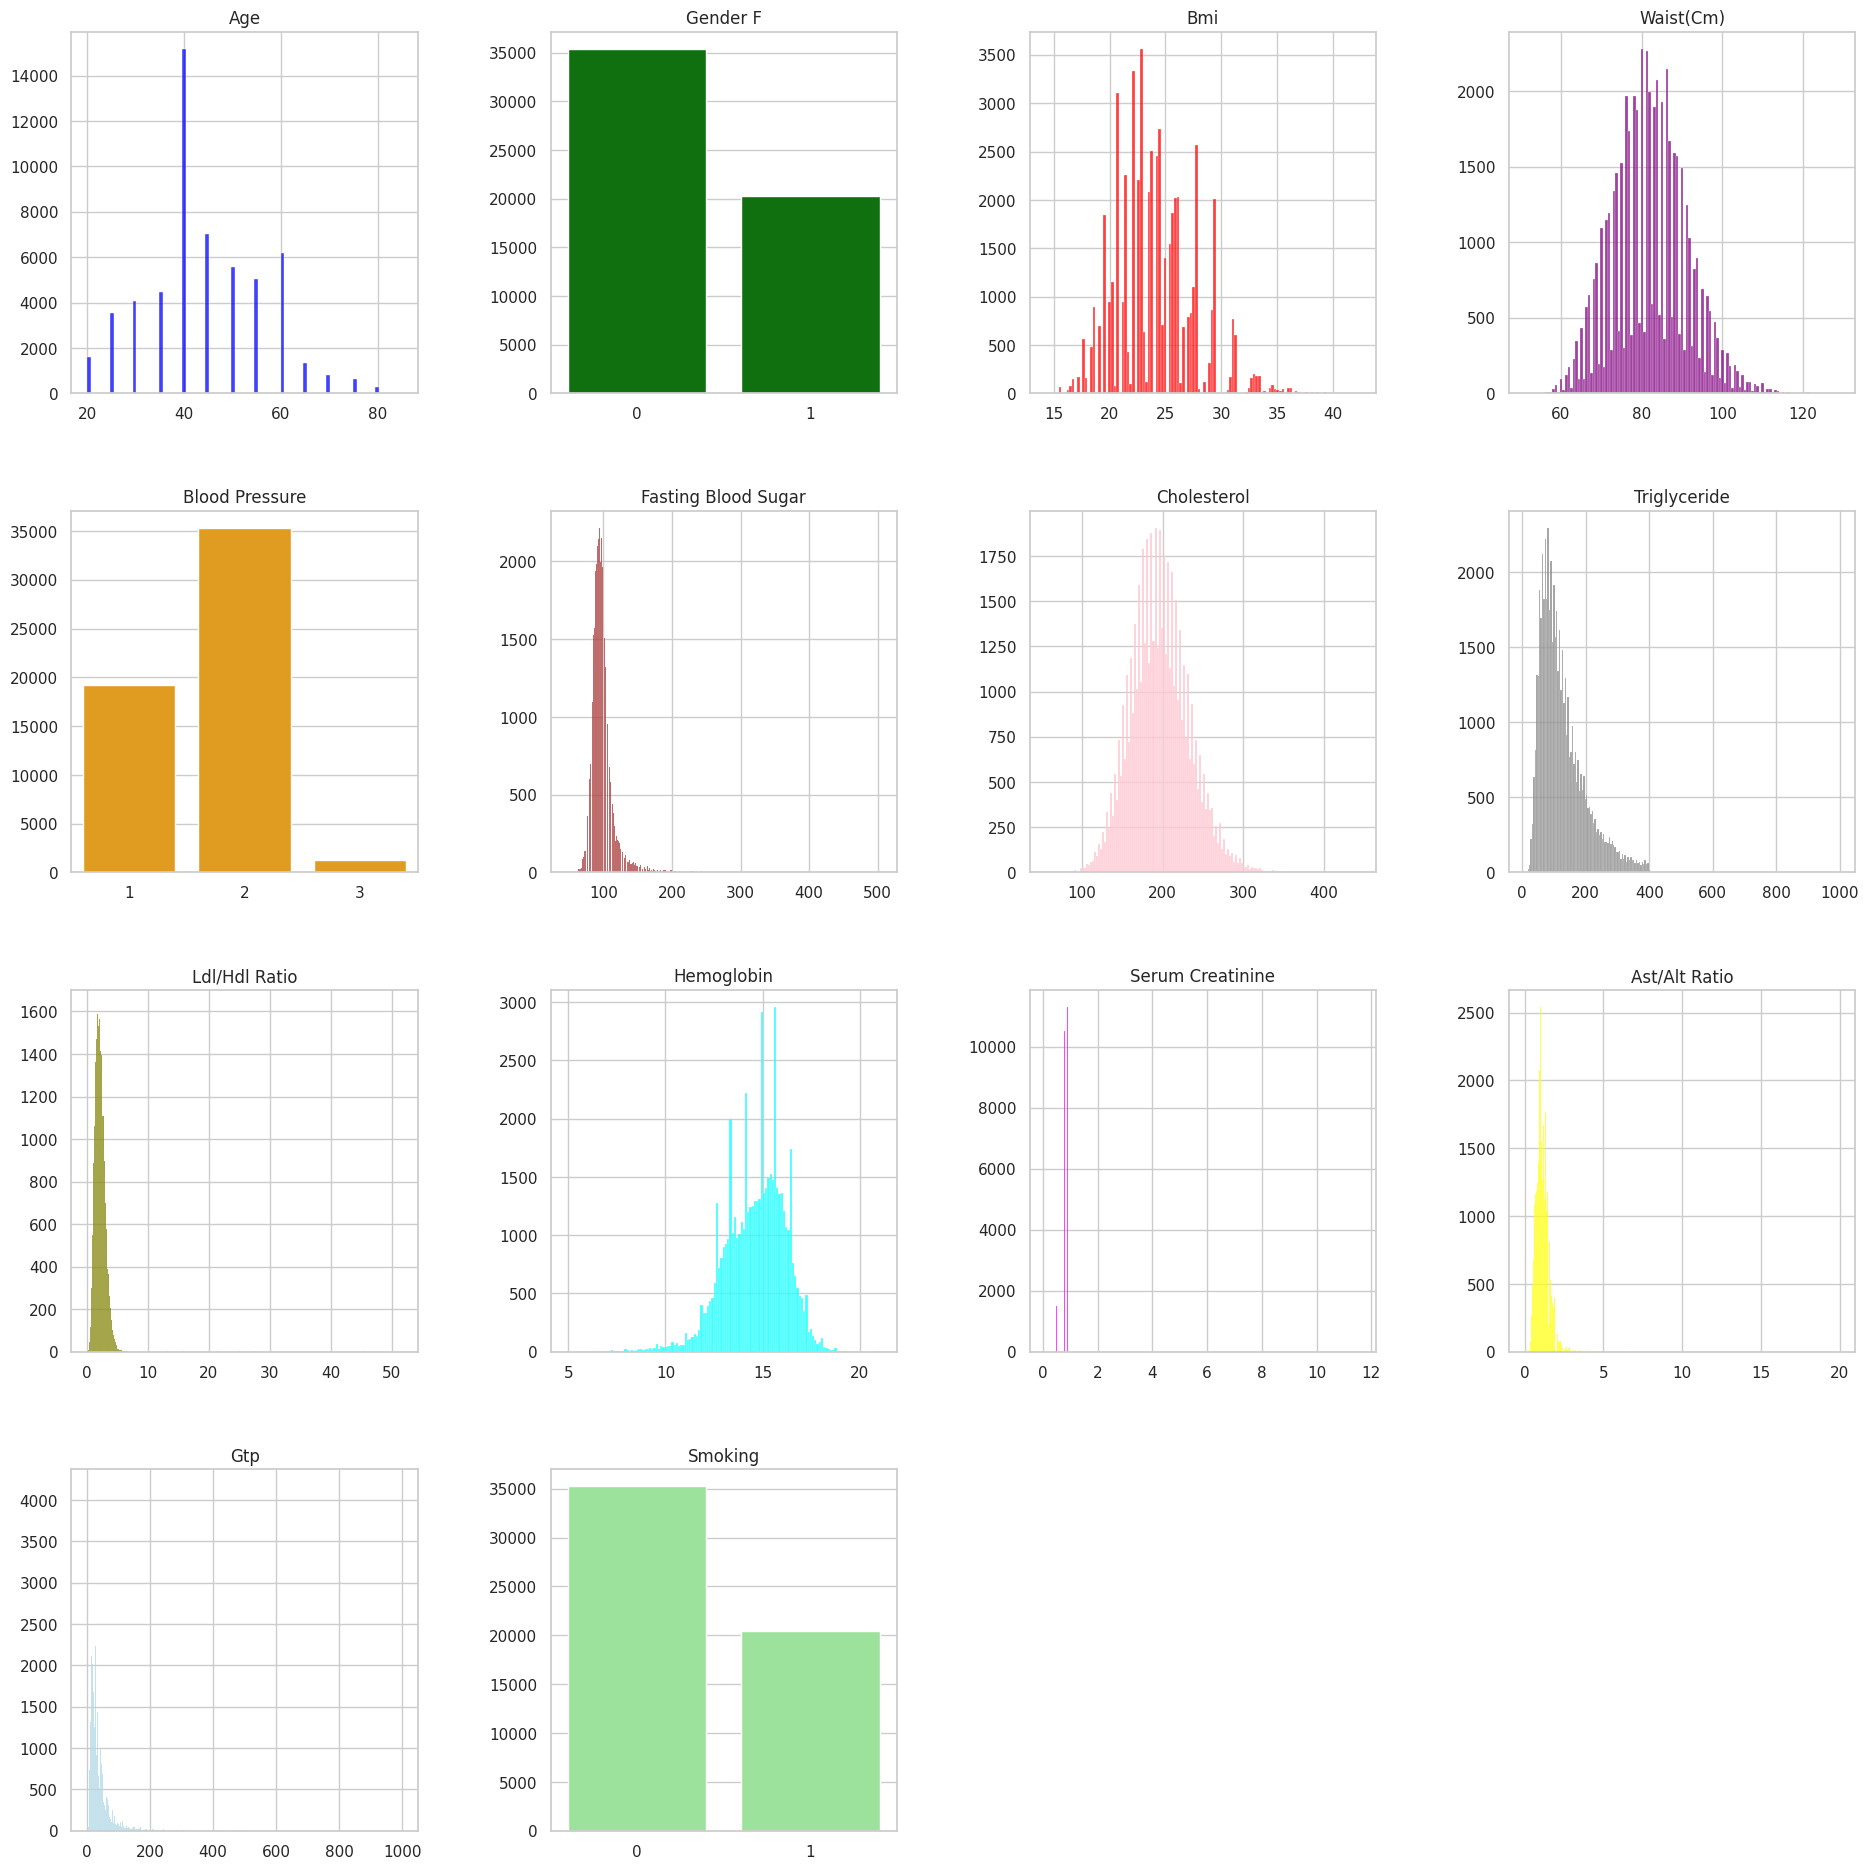

In [ ]:
# Recreating the grid layout with different colors for each plot
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Adjusting layout
plt.tight_layout(pad=5.0)

# Defining a list of colors for variety
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'lightblue', 'lightgreen']

# Plotting each column in the grid with a different color
for i, column in enumerate(columns):
    ax = axes[i // 4, i % 4]
    color = colors[i % len(colors)]  # Cycle through the colors list
    if column == 'gender_F' or column == 'smoking' or column == 'Blood Pressure':
        # For categorical data (Gender, Smoking, Blood Pressure)
        sns.countplot(x=column, data=cleanDataSet, ax=ax, palette=[color])
    else:
        # For continuous data
        sns.histplot(cleanDataSet[column], kde=False, ax=ax, color=color)
    ax.set_title(column.replace('_', ' ').title())
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove unused subplots (if any)
for i in range(len(columns), 16):
    fig.delaxes(axes.flatten()[i])

plt.show()
